In [ ]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import groq, openai
import os
from enum import Enum
from pydantic import BaseModel
from dotenv import load_dotenv


load_dotenv()

True

In [7]:
df = pd.read_csv(r'E:\Courses and Certifications\Zuu Crew\Building Production Ready ML Systems\Week 01\Data\Raw\ChurnModelling.csv')

In [8]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                600
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

## 3.Handeling Missing Values

In [9]:
df_cp = df.copy()
df_cp = df_cp.dropna(axis=1)
df_cp

,RowNumber,CustomerId,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,3,75075.31,2,1,0,92888.52,1


#### 3.2 Imputation

##### 3.2.1 Age


In [10]:
mean  = df['Age'].mean()
median = df['Age'].median()
mean_rounded = round(mean, 2)
median_rounded = round(median, 2)

print(f"Mean: {mean_rounded}, Median: {median_rounded}")

Mean: 38.91, Median: 37.0


<Axes: xlabel='Age', ylabel='Count'>

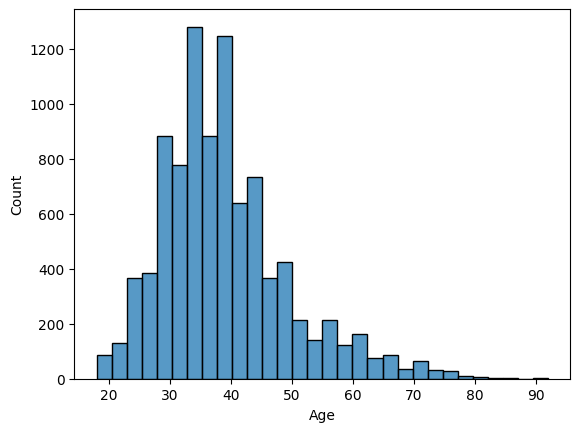

In [11]:
sns.histplot(df['Age'],bins=30)

In [12]:
df_impute = df.copy()

In [13]:
df_impute.loc[:,'Age'] = df_impute['Age'].fillna(mean)
df_impute.head()

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.000000,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.000000,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.000000,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,38.912128,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.000000,2,125510.82,1,1,1,79084.10,0


In [14]:
df_impute.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

##### 3.2.2 Gender

In [15]:
class Gender(str, Enum):
    MALE = "Male"
    FEMALE = "Female"
    
class GenderPrediction(BaseModel):
    firstname: str
    lastname: str
    pred_gender: Gender
    
def predict_gender(firstname: str, lastname: str):
    # Fixed typo: "modt" -> "most"
    prompt = f"""What is the most likely gender (Male or Female) for someone with the first name {firstname} and last name {lastname}?
    
    Your response only consists of one word: Male or Female"""
    
    # Need to initialize Groq client with API key
    client = groq.Groq(api_key=os.getenv('GROQ_API_KEY'))
    
    # Fixed typo: "responnse" -> "response"
    response = client.chat.completions.create(
        model="llama-3.3-70b-versatile", 
        messages=[{"role": "user", "content": prompt}]
    )
    
    # Fixed variable name: using "response" consistently
    predicted_gender = response.choices[0].message.content.strip()
    
    return predicted_gender

In [16]:
predict_gender("John", "Doe")

'Male'

In [17]:
predict_gender("Ruhan", "Nandalal")

'Male'

In [18]:
missing_gender_index = df_impute['Gender'].isnull()
for idx in df_impute[missing_gender_index].index:
    first_name = df_impute.loc[idx, 'Firstname']
    last_name = df_impute.loc[idx, 'Lastname']
    gender = predict_gender(first_name, last_name)
    if gender:
        df_impute.loc[idx, 'Gender'] = gender
        print(f"{first_name} {last_name} : {gender}")
    else:
        print(f"{first_name} {last_name} : No Gender Detected")

Eva Wilson : Female
Ivy Johnson : Female
David Taylor : Male
Frank Davis : Male
Jack Wilson : Male
David Miller : Male
Eva Taylor : Female
Grace Johnson : Female


KeyboardInterrupt: 